### Useful links from our meeting:
- **[MET dataset](https://github.com/metmuseum/openaccess)**

- **Useful python libraries to learn**: [Matplotlib](https://matplotlib.org/), [Pandas](https://pandas.pydata.org/)

- **Contact [PRDS](https://library.princeton.edu/research-data)** to publish your dataset at Princeton

- **[Clustering analysis](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)**

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('https://media.githubusercontent.com/media/metmuseum/openaccess/master/MetObjects.csv')

/Users/kmcelwee/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6,9,10,11,12,13,20,32,33,34,35,36,37,38,39,40,41,42,44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Department,AccessionYear,Object Name,Title,Culture,...,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL
0,1979.486.1,False,False,False,1,The American Wing,1979,Coin,One-dollar Liberty Head Coin,NaN,...,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN
1,1980.264.5,False,False,False,2,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,NaN,...,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN
2,67.265.9,False,False,False,3,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,...,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN
3,67.265.10,False,False,False,4,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,...,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN
4,67.265.11,False,False,False,5,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,...,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN


In [5]:
# Unfortunately there isn't much standardization here
df['Dimensions'].sample(10)

392314     16 × 38 1/2 × 12 1/2 in. (40.6 × 97.8 × 31.8 cm)
37962              Overall: 5 x 14 1/4 in. (12.7 x 36.2 cm)
256049             sheet: 15 x 12 1/16 in. (38.1 x 30.6 cm)
163311              9.8 x 12.8 cm. (3  7/8  x 5  1/16  in.)
309131           H. 15 in. (38.1 cm)\r\nW. 21 in. (53.3 cm)
373324              Sheet: 2 5/8 × 3 1/4 in. (6.6 × 8.2 cm)
192646    H. 62 1/2 x W. 14 x D. 15 in. (158.8 x 35.6 x ...
122234                    10 x 2 1/2 inches (25.4 x 6.4 cm)
335724                         L. 2 ft. 6-1/2 in., W. 6 in.
301620                                                  NaN
Name: Dimensions, dtype: object

In [7]:
# What percent of the MET's digitized objects are public domain?
df['Is Public Domain'] = df['Is Public Domain'].astype(bool)
d = {
    'is_public_domain': df[df['Is Public Domain']].shape[0] / df.shape[0] * 100,
    'is_not_public_domain': df[~df['Is Public Domain']].shape[0] / df.shape[0] * 100
}
d

{'is_public_domain': 50.307579803207936,
 'is_not_public_domain': 49.692420196792064}

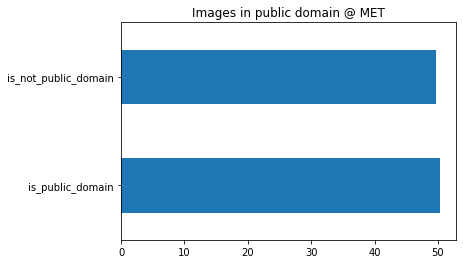

In [8]:
df_o = pd.DataFrame(d, index=[1]).T
df_o.plot(kind='barh', legend=False, title='Images in public domain @ MET')

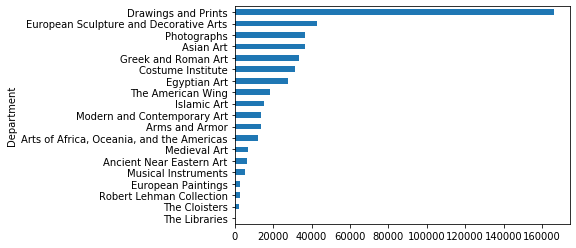

In [9]:
# Q: How many items does each department have?
df.groupby('Department')['Is Public Domain'].count().sort_values().plot(kind='barh')